In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(27)

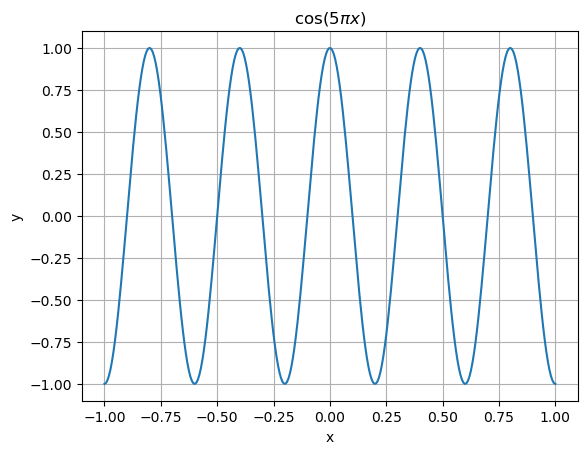

In [2]:
def cosineFunction(x):
  return (np.cos(5 * np.pi * x))

x = np.linspace(-1, 1, 300).reshape(-1, 1)
y = cosineFunction(x)
func1_x, func1_y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(func1_x, func1_y)
plt.title(r'${\cos(5 \pi x)}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer_1 = nn.Linear(1, 5)
        self.layer_2 = nn.Linear(5, 15)
        self.layer_3 = nn.Linear(15, 15)
        self.layer_4 = nn.Linear(15, 15)
        self.layer_5 = nn.Linear(15, 15)
        self.layer_6 = nn.Linear(15, 15)
        self.layer_7 = nn.Linear(15, 15)
        self.layer_8 = nn.Linear(15, 5)
        self.layer_9 = nn.Linear(5, 1)

    def forward(self, inputData):
        layerOut1 = nn.functional.relu(self.layer_1(inputData))
        layerOut2 = nn.functional.relu(self.layer_2(layerOut1))
        layerOut3 = nn.functional.relu(self.layer_3(layerOut2))
        layerOut4 = nn.functional.relu(self.layer_4(layerOut3))
        layerOut5 = nn.functional.relu(self.layer_5(layerOut4))
        layerOut6 = nn.functional.relu(self.layer_6(layerOut5))
        layerOut7 = nn.functional.relu(self.layer_7(layerOut6))
        layerOut8 = nn.functional.relu(self.layer_8(layerOut7))
        layerOut9 = self.layer_9(layerOut8)
        return layerOut9

In [4]:
def train(model, inputData, groundTruth):
    lossArr, gradients = [], []
    epoch = 0
    totalEpochs = 20000
    acceptableLoss = 0.0001
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
    isConverged = epoch >= totalEpochs
    print(f'Training for {totalEpochs} epochs until Loss goes below {acceptableLoss}')

    while not isConverged:
        model.train()
        predictedOutput = model(inputData)  
        loss = nn.MSELoss()(predictedOutput, groundTruth)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step() 
        currentLoss = loss.detach().numpy()
        lossArr.append(currentLoss)

        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        gradients.append(grad_norm)

        if epoch % 200 == 0:
            print(f'epoch: {epoch} currentLoss: {currentLoss}')
        epoch += 1
        isConverged = epoch >= totalEpochs or lossArr[-1] < acceptableLoss

    print(f'After training, loss: {lossArr[-1]}\n')
    return lossArr, gradients

In [5]:
model_one = Model()
model_one_losses, gradients = train(model_one, func1_x, func1_y)

Training for 20000 epochs until Loss goes below 0.0001
epoch: 0 currentLoss: 0.5124412775039673
epoch: 200 currentLoss: 0.5028351545333862
epoch: 400 currentLoss: 0.5016471147537231
epoch: 600 currentLoss: 0.5016226172447205
epoch: 800 currentLoss: 0.5016077160835266
epoch: 1000 currentLoss: 0.5015820860862732
epoch: 1200 currentLoss: 0.5015329122543335
epoch: 1400 currentLoss: 0.5014192461967468
epoch: 1600 currentLoss: 0.5010685920715332
epoch: 1800 currentLoss: 0.49956583976745605
epoch: 2000 currentLoss: 0.49167734384536743
epoch: 2200 currentLoss: 0.44990453124046326
epoch: 2400 currentLoss: 0.3663228452205658
epoch: 2600 currentLoss: 0.3182252049446106
epoch: 2800 currentLoss: 0.27746841311454773
epoch: 3000 currentLoss: 0.2510203421115875
epoch: 3200 currentLoss: 0.23654966056346893
epoch: 3400 currentLoss: 0.2261330485343933
epoch: 3600 currentLoss: 0.21835093200206757
epoch: 3800 currentLoss: 0.21246136724948883
epoch: 4000 currentLoss: 0.20761261880397797
epoch: 4200 currentL

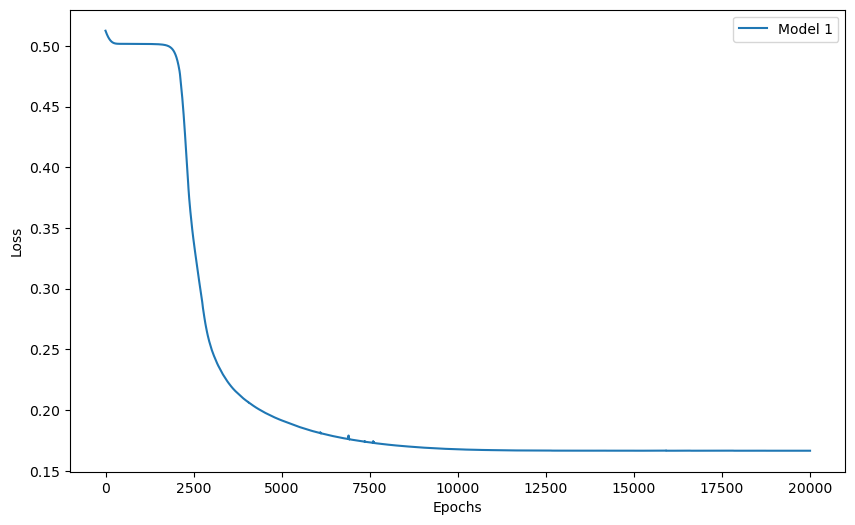

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(model_one_losses, label='Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

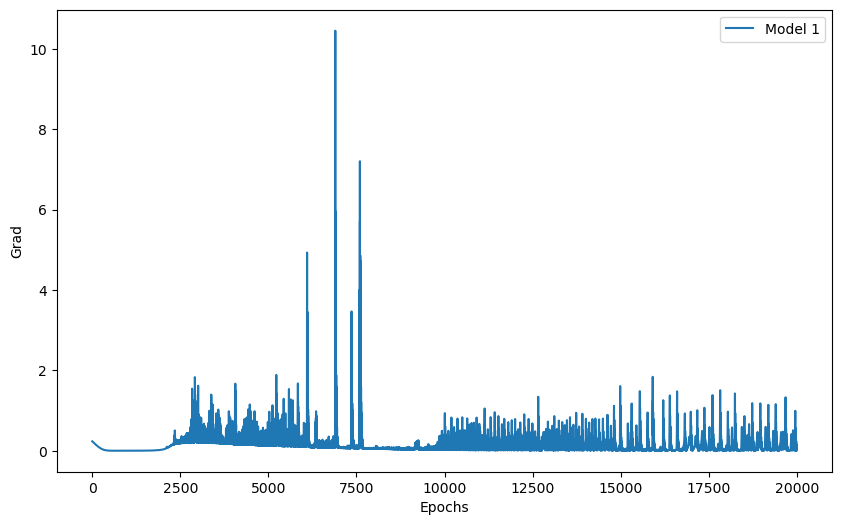

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(gradients, label='Model 1')
plt.xlabel('Epochs')
plt.ylabel('Grad')
plt.legend()
plt.show()